In [1]:
import librosa
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
file_names = os.listdir('train/')

In [3]:
file_names[0]

'0000MA.wav'

In [4]:
n_dict = { 'MA' : 0, 'FA' : 0, 'MH' : 0, 'FH' : 0, 'MS' : 0, 'FS' : 0, 'MW' : 0, 'FW' : 0, 'MN' : 0, 'FN' : 0 }
for i in file_names : 
    n_dict[ i[4:6] ] += 1
n_dict

{'MA': 415,
 'FA': 308,
 'MH': 59,
 'FH': 71,
 'MS': 120,
 'FS': 182,
 'MW': 68,
 'FW': 81,
 'MN': 493,
 'FN': 197}

<AxesSubplot:>

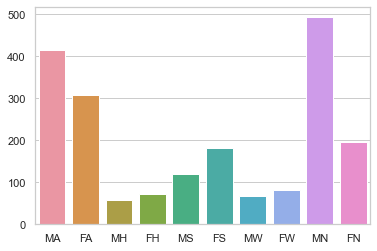

In [5]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
sns.barplot(list(n_dict.keys()), list(n_dict.values()))

In [6]:
sounds = []
for i in range(1994) : 
    path = 'train/'+ file_names[i]
    sounds.append(librosa.load(path))

In [7]:
# saving plots for using in CNN code, no need to run for the LSTM approach
# cnt=0
# for i in range(len(file_names)) : 
#     cnt+=1
#     librosa.display.waveplot(sounds[i][0], sr=sounds[i][1])
#     plt.axis('off')
#     plt.savefig('waveform/'  + str(cnt) + file_names[i][4:6])
#     plt.clf()


# cnt=0
# for i in range(len(file_names)) : 
#     cnt+=1
#     X = librosa.stft(sounds[i][0])
#     Xdb = librosa.amplitude_to_db(abs(X))
#     librosa.display.specshow(Xdb, sr=sounds[i][1])
#     plt.colorbar()
#     plt.axis('off')
    
#     plt.savefig('spectogram/'  + str(cnt) + file_names[i][4:6])
#     plt.clf()


# from librosa import display
# cnt=0
# for i in range(len(file_names)) : 
#     cnt+=1
#     chroma = librosa.feature.chroma_stft(y=sounds[i][0], sr=sounds[i][1])
#     librosa.display.specshow(chroma, sr=sounds[i][1])
#     plt.axis('off')
#     plt.savefig('chromagram/'  + str(cnt) + file_names[i][4:6])
#     plt.clf()

In [8]:

def extract_MFCC(file):
    y, sr = file[0], file[1]
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=36).T,axis=0)
    return mfccs



def extract_CENS(file):
    y, sr = file[0], file[1]
    cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr, n_chroma=36, bins_per_octave=36).T,axis=0)
    return cens


def extract_CHROME(file):
    y, sr = file[0], file[1]
    chrom = librosa.feature.chroma_stft(y=y, sr=sr)
    return chrom


def extract_ZCRATE(file):
    y, sr = file[0], file[1]
    crossrate = librosa.feature.zero_crossing_rate(y=y).T
    return crossrate

In [9]:
cens = []
for s in sounds : 
    cens.append(extract_CENS(s))

In [10]:
mfcs = []
for s in sounds : 
    mfcs.append(extract_MFCC(s))

In [11]:
########## just a mere criousity satisfaction, not anything we're gonna use later
# for name in ['A', 'N', 'H', 'S', 'W'] : 
#     note_count = {0 : 0, 1 : 0, 2 : 0, 3 : 0, 4 : 0, 5 : 0, 6 : 0, 7 : 0, 8 : 0, 9 : 0, 10 : 0, 11 : 0 }
#     for i in range(1994) : 
#         if file_names[i][5] == name:
#             for j in range(12) :  
#                 note_count_wonder[j] += chrgram[i][j].sum() #### should be array
#     plt.title(name)
#     sns.barplot(x=['B', 'A#', 'A', 'G#', 'G', 'F#', 'F', 'E', 'D#', 'D', 'C#', 'C'], y=list(note_count_wonder.values()))
#     plt.savefig('note_count_'+name)
#     plt.show()


In this section we try to find features to feed the ANN part, these are single features like how many time the waveform plot crosses the zero line or ....
We will plot their corelation with each class just to see if they would be usefull

<AxesSubplot:title={'center':'Spectrum Contrast Mean Of Each Class Amplified'}>

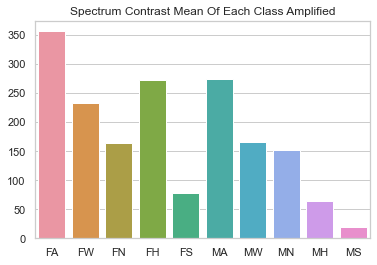

In [12]:
##### difference of spec contrast on each class
spec_dict = {'FA' : 0, 'FW' : 0,'FN' : 0,'FH' : 0,'FS' : 0,'MA' : 0,'MW' : 0,'MN' : 0,'MH' : 0,'MS' : 0,}
for i in range(1994) : 
    spec_dict[file_names[i][4:6]] = (spec_dict[file_names[i][4:6]] + np.mean(librosa.feature.spectral_contrast(sounds[i][0])))/2


for i in spec_dict : 
    spec_dict[i] = spec_dict[i]*100 - 100*min(list(spec_dict.values())) + 20

plt.title('Spectrum Contrast Mean Of Each Class Amplified')
sns.barplot(list(spec_dict.keys()), list(spec_dict.values()))

<AxesSubplot:title={'center':'Spectrum Flatness Mean Of Each Class'}>

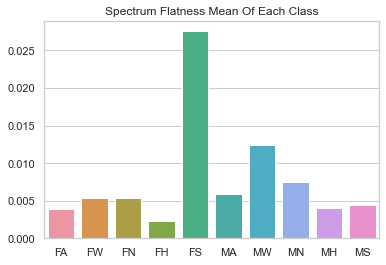

In [13]:
spec_flat_dict = {'FA' : 0, 'FW' : 0,'FN' : 0,'FH' : 0,'FS' : 0,'MA' : 0,'MW' : 0,'MN' : 0,'MH' : 0,'MS' : 0,}
for i in range(1994) : 
    spec_flat_dict[file_names[i][4:6]] = (spec_flat_dict[file_names[i][4:6]] + np.mean(librosa.feature.spectral_flatness(sounds[i][0])))/2


plt.title('Spectrum Flatness Mean Of Each Class')
sns.barplot(list(spec_flat_dict.keys()), list(spec_flat_dict.values()))


<AxesSubplot:title={'center':'Zero Cross Rate Of Each Class'}>

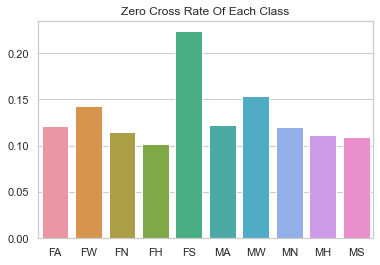

In [14]:
zero_cross_rate_dict = {'FA' : 0, 'FW' : 0,'FN' : 0,'FH' : 0,'FS' : 0,'MA' : 0,'MW' : 0,'MN' : 0,'MH' : 0,'MS' : 0,}
for i in range(1994) : 
    zero_cross_rate_dict[file_names[i][4:6]] = (zero_cross_rate_dict[file_names[i][4:6]] + np.mean(librosa.feature.zero_crossing_rate(sounds[i][0])))/2


plt.title('Zero Cross Rate Of Each Class')
sns.barplot(list(zero_cross_rate_dict.keys()), list(zero_cross_rate_dict.values()))

<AxesSubplot:title={'center':'Male number vs Female nuber'}>

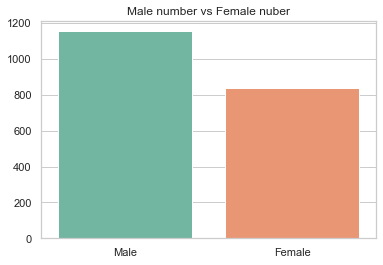

In [15]:
male_female_dict = {'Male' : 0, 'Female':0}
for i in range(1994):
    if file_names[i][4] == 'F' : 
        male_female_dict['Female'] += 1
    else :
        male_female_dict['Male'] += 1


plt.title('Male number vs Female nuber')
sns.barplot(list(male_female_dict.keys()), list(male_female_dict.values()))

<AxesSubplot:title={'center':'Rolloff Mean Rate Of Each Class'}>

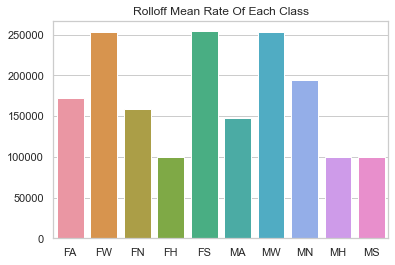

In [16]:
rolloff_dict = {'FA' : 0, 'FW' : 0,'FN' : 0,'FH' : 0,'FS' : 0,'MA' : 0,'MW' : 0,'MN' : 0,'MH' : 0,'MS' : 0,}
for i in range(1994) : 
    rolloff_dict[file_names[i][4:6]] = (rolloff_dict[file_names[i][4:6]] + np.mean(librosa.feature.spectral_rolloff(sounds[i][0])))/2


for i in spec_dict : 
    rolloff_dict[i] = rolloff_dict[i]*100 - 100*min(list(rolloff_dict.values())) + 100000


plt.title('Rolloff Mean Rate Of Each Class')
sns.barplot(list(rolloff_dict.keys()), list(rolloff_dict.values()))

In [17]:
zero_cross_rate = []
flatness_rate = []
rolloff_rate = []
contrast_rate = []


for i in range(1994) : 
    tmp1 = librosa.feature.zero_crossing_rate(y=sounds[i][0])
    zero_cross_rate.append(np.mean(tmp1[0]))


    tmp2 = librosa.feature.spectral_flatness(y=sounds[i][0])
    flatness_rate.append(np.mean(tmp2))


    tmp3 = librosa.feature.spectral_rolloff(y=sounds[i][0], roll_percent=0.0001)
    rolloff_rate.append(np.mean(tmp3))

    
    tmp4 = librosa.feature.spectral_contrast(y=sounds[i][0])
    contrast_rate.append(np.mean(tmp4)) 



for i in range(1994) : 
    zero_cross_rate[i] = max(zero_cross_rate)
    flatness_rate[i] = max(flatness_rate)
    rolloff_rate[i] = max(rolloff_rate)
    contrast_rate[i] = max(contrast_rate)

zero_cross_rate = np.array(zero_cross_rate)
zero_cross_rate = zero_cross_rate.reshape((1994, 1))

flatness_rate = np.array(flatness_rate)
flatness_rate = flatness_rate.reshape((1994, 1))

rolloff_rate = np.array(rolloff_rate)
rolloff_rate = rolloff_rate.reshape((1994, 1))

contrast_rate = np.array(contrast_rate)
contrast_rate = contrast_rate.reshape((1994, 1))



single_features = np.concatenate([zero_cross_rate, flatness_rate, rolloff_rate, contrast_rate], axis=1)
single_features.shape

(1994, 4)

In [18]:
labels = []
label_dictionary = {'A' : [1, 0, 0, 0, 0], 'N' : [0, 1, 0, 0, 0], 'H' : [0, 0, 1, 0, 0], 'S' : [0, 0, 0, 1, 0], 'W' : [0, 0, 0, 0, 1],}

for i in range(1994) : 
    labels.append(label_dictionary[file_names[i][5]])

In [19]:
cens = np.asarray(cens)
cens = cens.reshape((1994, 36, 1))

mfcs = np.asarray(mfcs)
mfcs = mfcs.reshape((1994, 36, 1))

features = np.concatenate([mfcs, cens], axis=2)
features.shape

(1994, 36, 2)

In [ ]:
Sex = []
for i in range(1994) : 
    if file_names[i][4] == "F" : 
        Sex.append(1)
    else :
        Sex.append(0)
        
Sex = np.array(Sex)
Sex = Sex.reshape((1994, 1))

single_features = np.concatenate([single_features, Sex], axis=1)
single_features.shape

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 36, 1)]      0                                            
__________________________________________________________________________________________________
bidirectional_8 (Bidirectional) (None, 36, 72)       10944       input_layer[0][0]                
__________________________________________________________________________________________________
bidirectional_9 (Bidirectional) (None, 72)           31392       bidirectional_8[0][0]            
__________________________________________________________________________________________________
layer1 (Dense)                  (None, 18)           1314        bidirectional_9[0][0]            
______________________________________________________________________________________________

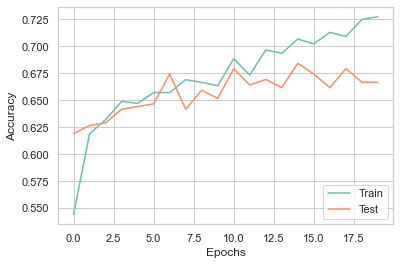

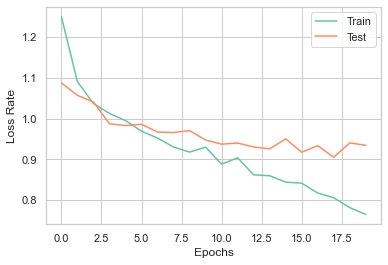

In [26]:
from tensorflow.keras.layers import Dense , Dropout ,Input , LSTM, Activation, Bidirectional, concatenate, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras import initializers



########## approach 1 : uncomment this on use
################################################################################################################
# model = Sequential()
# model.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh'), input_shape=(36, 1)))
# model.add(Bidirectional(LSTM(72, activation='tanh')))
# model.add(Dense(17, activation='tanh'))
# model.add(Dense(5))
# model.add(Activation('softmax'))
# #opt = RMSprop(lr=0.00001)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# history = model.fit(mfcs, np.array(labels) ,validation_split=0.2, epochs=10, batch_size = 32 ,verbose=1)
################################################################################################################






########### adding M F
######### approach 2 : uncomment this on use
#################################################################################################################
# input_layer = Input(shape=(36,1), name ="input_layer")
# lstm_layer1 = Bidirectional(LSTM(36, return_sequences=True, activation='tanh'), input_shape=(36, 1))(input_layer)
# lstm_layer2 = Bidirectional(LSTM(36, activation='tanh'))(lstm_layer1)

# ann_input_layer = Input(shape=(4), name='ann_input_layer')
# concat_layer = concatenate([ann_input_layer, lstm_layer2])

# hidden_layer1 = Dense(35 ,activation='tanh' , name="layer0")(concat_layer)
# hidden_layer2 = Dense(15 ,activation='tanh' , name="layer1")(hidden_layer1)
# hidden_layer3 = Dense(5 ,activation='softmax' , name="hidden_layer2")(hidden_layer2)

################################################################################################################################################################






# ######### approach 3 : uncomment this on use
# #################################################################################################################
initializer = initializers.RandomNormal(mean=0., stddev=1.)

input_layer = Input(shape=(36,1), name ="input_layer")
lstm_layer1 = Bidirectional(LSTM(36, return_sequences=True, activation='tanh'), input_shape=(36, 1))(input_layer)
lstm_layer2 = Bidirectional(LSTM(36, activation='tanh'))(lstm_layer1)

hidden_layer2 = Dense(18 ,activation='tanh' , name="layer1")(lstm_layer2)
hidden_layer3 = Dense(5 ,activation='softmax' , name="hidden_layer2")(hidden_layer2) ############ change this 5 to a 10 or so

ann_input_layer = Input(shape=(5), name='ann_input_layer')
concat_layer = concatenate([ann_input_layer, hidden_layer3])

hidden_layer4 = Dense(15 ,activation='tanh' , name="layer1")(concat_layer)
hidden_layer5 = Dense(15 ,activation='tanh' , name="layer1")(hidden_layer4)
hidden_layer6 = Dense(5 ,activation='softmax' , name="hidden_layer2")(hidden_layer5)
# ####################################################################################################################





# ######### approach 4 : uncomment this on use, this one was just app3 but with GRU networks hich didnt work really better but faster
# #################################################################################################################
# input_layer = Input(shape=(36,1), name ="input_layer")
# lstm_layer1 = Bidirectional(GRU(36, return_sequences=True, activation='tanh'), input_shape=(36, 1))(input_layer)
# lstm_layer2 = Bidirectional(GRU(36, activation='tanh'))(lstm_layer1)

# hidden_layer2 = Dense(15 ,activation='tanh' , name="layer1")(lstm_layer2)
# hidden_layer3 = Dense(5 ,activation='softmax' , name="hidden_layer2")(hidden_layer2) ############ change this 5 to a 10 or so


# ann_input_layer = Input(shape=(5), name='ann_input_layer')
# concat_layer = concatenate([ann_input_layer, hidden_layer2])


# hidden_layer4 = Dense(15 ,activation='tanh' , name="layer1")(concat_layer)
# hidden_layer5 = Dense(10 ,activation='tanh' , name="layer1")(hidden_layer4)
# hidden_layer6 = Dense(5 ,activation='softmax' , name="hidden_layer2")(hidden_layer5)
# # ####################################################################################################################




model = Model(inputs=[input_layer, ann_input_layer], outputs=[hidden_layer3], name='model')
#keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)
model.summary()


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit( x= (mfcs, single_features), y=np.array(labels) ,validation_split=0.2, epochs=20, batch_size = 32)
################################################################################################################################################################











plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Rate')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

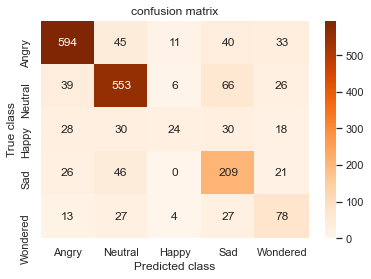

In [27]:
def strDemonstration(li) :
    label_dict = {0 : 'Angry', 1 : 'Neutral', 2 : 'Happy', 3 : 'Sad', 4 : 'Wondered'}
    index = li.argmax()
    return label_dict[index]



predictions = model.predict(mfcs)
real = np.array(labels).copy()

confusion1 = []
confusion2 = []

for i in range(1994) : 
    confusion1.append(strDemonstration(real[i]))
    confusion2.append(strDemonstration(predictions[i]))



confusion1 = np.asarray(confusion1)
confusion2 = np.asarray(confusion2)

from sklearn.metrics import confusion_matrix

LABELS=["Angry", "Neutral", "Happy", 'Sad', 'Wondered']

conf_matrix = confusion_matrix(confusion1, confusion2, labels=LABELS)

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Oranges")
plt.title("confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [33]:
def strDemonstration2(li) :
    label_dict = {0 : 'A', 1 : 'N', 2 : 'H', 3 : 'S', 4 : 'W'}
    index = li.argmax()
    return label_dict[index]

test_file_names = os.listdir('test/')


test_sounds = []
for i in range(len(test_file_names)) : 
    path = 'test/'+ test_file_names[i]
    test_sounds.append(librosa.load(path))



test_mfcs = []
for s in test_sounds : 
    test_mfcs.append(extract_MFCC(s))







test_zero_cross_rate = []
test_flatness_rate = []
test_rolloff_rate = []
test_contrast_rate = []


for i in range(len(test_file_names)) : 
    test_tmp1 = librosa.feature.zero_crossing_rate(y=test_sounds[i][0])
    test_zero_cross_rate.append(np.mean(test_tmp1[0]))


    test_tmp2 = librosa.feature.spectral_flatness(y=test_sounds[i][0])
    test_flatness_rate.append(np.mean(test_tmp2))


    test_tmp3 = librosa.feature.spectral_rolloff(y=test_sounds[i][0], roll_percent=0.0001)
    test_rolloff_rate.append(np.mean(test_tmp3))

    
    test_tmp4 = librosa.feature.spectral_contrast(y=test_sounds[i][0])
    test_contrast_rate.append(np.mean(test_tmp4)) 



for i in range(len(test_file_names)) : 
    test_zero_cross_rate[i] = max(test_zero_cross_rate)
    test_flatness_rate[i] = max(test_flatness_rate)
    test_rolloff_rate[i] = max(test_rolloff_rate)
    test_contrast_rate[i] = max(test_contrast_rate)

test_zero_cross_rate = np.array(test_zero_cross_rate)
test_zero_cross_rate = test_zero_cross_rate.reshape((len(test_file_names), 1))

test_flatness_rate = np.array(test_flatness_rate)
test_flatness_rate = test_flatness_rate.reshape((len(test_file_names), 1))

test_rolloff_rate = np.array(test_rolloff_rate)
test_rolloff_rate = test_rolloff_rate.reshape((len(test_file_names), 1))

test_contrast_rate = np.array(test_contrast_rate)
test_contrast_rate = test_contrast_rate.reshape((len(test_file_names), 1))



test_single_features = np.concatenate([test_zero_cross_rate, test_flatness_rate, test_rolloff_rate, test_contrast_rate], axis=1)
test_single_features.shape







test_Sex = []
for i in range(len(test_file_names)) : 
    if test_file_names[i][4] == "F" : 
        test_Sex.append(1)
    else :
        test_Sex.append(0)
        
test_Sex = np.array(test_Sex)
test_Sex = test_Sex.reshape((len(test_file_names), 1))

test_single_features = np.concatenate([test_single_features, test_Sex], axis=1)
test_single_features.shape



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [43]:

test_mfcs = np.array(test_mfcs)
test_mfcs = test_mfcs.reshape((227, 36, 1))
test_single_features = test_single_features.reshape((227, 5, 1))
test_predictions = model.predict((test_mfcs, test_single_features))


TypeError: Index(...) must be called with a collection of some kind, False was passed

In [45]:
print(test_predictions[0], test_predictions[1])
for i in range(227):
    maxArg = test_predictions[i].argmax()
    for j in range(5) : 
        if j == maxArg : 
            test_predictions[i][j] = 1
        else : 
            test_predictions[i][j] = 0
print(test_predictions[0], test_predictions[1])

[0.04189263 0.6295405  0.16579868 0.06984292 0.09292523] [0.01196818 0.7948099  0.05592296 0.07126405 0.06603496]
[0. 1. 0. 0. 0.] [0. 1. 0. 0. 0.]


In [46]:
answers = []
for i in range(len(test_file_names)) : 
    answers.append(strDemonstration(test_predictions[i]))


TypeError: Index(...) must be called with a collection of some kind, False was passed

In [48]:
answers = np.array(answers)

In [50]:
answers

array(['Neutral', 'Neutral', 'Neutral', 'Angry', 'Angry', 'Angry',
       'Neutral', 'Wondered', 'Angry', 'Happy', 'Neutral', 'Wondered',
       'Sad', 'Neutral', 'Angry', 'Sad', 'Sad', 'Angry', 'Neutral',
       'Neutral', 'Angry', 'Neutral', 'Angry', 'Angry', 'Sad', 'Angry',
       'Angry', 'Sad', 'Angry', 'Sad', 'Neutral', 'Neutral', 'Neutral',
       'Sad', 'Neutral', 'Neutral', 'Wondered', 'Wondered', 'Angry',
       'Neutral', 'Sad', 'Sad', 'Angry', 'Sad', 'Neutral', 'Angry',
       'Angry', 'Angry', 'Angry', 'Neutral', 'Sad', 'Neutral', 'Neutral',
       'Neutral', 'Sad', 'Neutral', 'Neutral', 'Wondered', 'Angry',
       'Angry', 'Neutral', 'Sad', 'Angry', 'Wondered', 'Neutral', 'Sad',
       'Angry', 'Angry', 'Angry', 'Neutral', 'Angry', 'Neutral', 'Angry',
       'Sad', 'Neutral', 'Sad', 'Wondered', 'Wondered', 'Neutral',
       'Angry', 'Neutral', 'Wondered', 'Sad', 'Neutral', 'Angry',
       'Neutral', 'Sad', 'Wondered', 'Angry', 'Neutral', 'Angry',
       'Neutral', 'Angry'

In [51]:

submit_file = pd.DataFrame()

In [62]:
sbf = []
for i in test_file_names : 
    sbf.append(i[:-4])
#sbf

In [65]:
submit_file['id'] = np.array(sbf)
submit_file['label'] = np.array(answers)
submit_file

,id,label
0,2705F,Neutral
1,2707M,Neutral
2,2708F,Neutral
3,2710M,Angry
4,2711M,Angry
...,...,...
222,2992M,Sad
223,2993M,Sad
224,2995M,Neutral
225,2996F,Neutral


In [68]:
submit_file['label'] = submit_file['label'].map({'Neutral' : 'N', 'Angry' : 'A', 'Sad' : 'S', 'Happy' : 'H', 'Wondered' : 'W'})
submit_file

,id,label
0,2705F,N
1,2707M,N
2,2708F,N
3,2710M,A
4,2711M,A
...,...,...
222,2992M,S
223,2993M,S
224,2995M,N
225,2996F,N


In [69]:
submit_file.to_csv('test_predictions.csv')